In [2]:
from traffic_env import TrafficEnvironment

env = TrafficEnvironment()
state = env.reset()

for _ in range(10):
    action=0
    next_state, reward = env.step(action)
    print(f"Etat {next_state}, recompense : {reward}")

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [1 5 6 0] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 3 8 0]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 2:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [3 4 6 2]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 3:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [1 0 6 4]
  🎯 Reward (Cars Passed): 7
----------------------------------------
Step 4:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [1 2 1 0]
  🎯 Reward (Cars Passed): 7
----------------------------------------
Step 5:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [3 2 2 2]
  🎯 Reward (Cars Passed): 1
------------------

# Exercice 2

In [5]:
import numpy as np

# Q-Learning Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration-exploitation tradeoff

# Ensure state values stay within the Q-table range
def get_state_index(state):
    return tuple(np.clip(state // 2, 0, 5))  # Ensure index is within [0, 5]

# Initialize Q-table
Q = np.zeros((6, 6, 6, 6, 2))  # 4D state space + 2 actions

# Q-Learning Algorithm
def q_learning(env, episodes=5000):
    for episode in range(episodes):
        state = env.reset()
        state_idx = get_state_index(state)  # Convert state to Q-table index

        for _ in range(100):  # Limit episode length to prevent infinite loops
            # Choose action using epsilon-greedy strategy
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])  # Explore
            else:
                action = np.argmax(Q[state_idx])  # Exploit
            
            next_state, reward = env.step(action)
            next_state_idx = get_state_index(next_state)

            # Q-Learning update rule
            Q[state_idx + (action,)] += alpha * (reward + gamma * np.max(Q[next_state_idx]) - Q[state_idx + (action,)])

            state_idx = next_state_idx  # Move to next state
    
    return Q

# Train the agent
q_table = q_learning(env)
print("✅ Q-Learning Training Completed!")
print(q_table)


✅ Q-Learning Training Completed!
[[[[[29.3495348  30.04746366]
    [31.09902944 30.81846809]
    [30.93849463 31.62127695]
    [29.29049861 27.34640386]
    [27.39524158 14.60122323]
    [26.0823661   8.69490908]]

   [[30.6335356  31.46912191]
    [31.46285295 32.90267903]
    [31.69098003 33.8581369 ]
    [30.41651261 33.55022438]
    [26.61898208 34.57862641]
    [28.66168336 24.70433799]]

   [[31.15566299 31.59418327]
    [31.43864981 33.69302629]
    [31.75429478 32.98454906]
    [29.5267118  34.22006983]
    [30.66619441 26.37175554]
    [30.31993465 32.32276593]]

   [[28.98680245 32.0270211 ]
    [31.18353586 33.74964003]
    [30.67359288 34.06243946]
    [28.46999032 35.14093733]
    [28.72529004 34.20054968]
    [29.19779987 34.23273978]]

   [[27.23826573 14.76329142]
    [27.4357307  33.63903843]
    [27.80658096 34.56577349]
    [22.85275559 34.63447164]
    [32.34200367 30.61477819]
    [28.96101269 34.81285068]]

   [[25.26566211  2.85342406]
    [29.15131551 19.1730253

In [5]:
import numpy as np

# Q-Learning Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration-exploitation tradeoff

# Ensure state values stay within the Q-table range
def get_state_index(state):
    return tuple(np.clip(state // 2, 0, 5))  # Ensure index is within [0, 5]

# Initialize Q-table
Q = np.zeros((6, 6, 6, 6, 2))  # 4D state space + 2 actions

# Q-Learning Algorithm
def q_learning(env, episodes=5000):
    for episode in range(episodes):
        state = env.reset()
        state_idx = get_state_index(state)  # Convert state to Q-table index

        for _ in range(100):  # Limit episode length to prevent infinite loops
            # Choose action using epsilon-greedy strategy
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])  # Explore
            else:
                action = np.argmax(Q[state_idx])  # Exploit
            
            next_state, reward = env.step(action)
            next_state_idx = get_state_index(next_state)

            # Q-Learning update rule
            Q[state_idx + (action,)] += alpha * (reward + gamma * np.max(Q[next_state_idx]) - Q[state_idx + (action,)])

            state_idx = next_state_idx  # Move to next state
    
    return Q

# Train the agent
q_table = q_learning(env)
print("✅ Q-Learning Training Completed!")
print(q_table)


✅ Q-Learning Training Completed!
[[[[[29.3495348  30.04746366]
    [31.09902944 30.81846809]
    [30.93849463 31.62127695]
    [29.29049861 27.34640386]
    [27.39524158 14.60122323]
    [26.0823661   8.69490908]]

   [[30.6335356  31.46912191]
    [31.46285295 32.90267903]
    [31.69098003 33.8581369 ]
    [30.41651261 33.55022438]
    [26.61898208 34.57862641]
    [28.66168336 24.70433799]]

   [[31.15566299 31.59418327]
    [31.43864981 33.69302629]
    [31.75429478 32.98454906]
    [29.5267118  34.22006983]
    [30.66619441 26.37175554]
    [30.31993465 32.32276593]]

   [[28.98680245 32.0270211 ]
    [31.18353586 33.74964003]
    [30.67359288 34.06243946]
    [28.46999032 35.14093733]
    [28.72529004 34.20054968]
    [29.19779987 34.23273978]]

   [[27.23826573 14.76329142]
    [27.4357307  33.63903843]
    [27.80658096 34.56577349]
    [22.85275559 34.63447164]
    [32.34200367 30.61477819]
    [28.96101269 34.81285068]]

   [[25.26566211  2.85342406]
    [29.15131551 19.1730253

# Exercice 3

In [6]:
import numpy as np

# SARSA Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration-exploitation tradeoff
num_episodes = 5000 
max_steps_per_episode = 100  # Prevent infinite loops

def sarsa(env, episodes=num_episodes):
    Q = np.zeros((6, 6, 6, 6, 2))  # Q-table

    for episode in range(episodes):
        state = env.reset()
        state_idx = get_state_index(state)
        action = np.random.choice([0, 1]) if np.random.rand() < epsilon else np.argmax(Q[state_idx])

        for step in range(max_steps_per_episode):  # Limit steps per episode
            next_state, reward = env.step(action)
            next_state_idx = get_state_index(next_state)
            next_action = np.random.choice([0, 1]) if np.random.rand() < epsilon else np.argmax(Q[next_state_idx])

            # SARSA update rule
            Q[state_idx + (action,)] += alpha * (reward + gamma * Q[next_state_idx + (next_action,)] - Q[state_idx + (action,)])

            state_idx, action = next_state_idx, next_action

        # Print progress every 1000 episodes
        if (episode + 1) % 1000 == 0:
            print(f"✅ Episode {episode + 1}/{episodes} completed.")

    return Q

# Train the SARSA agent
sarsa_table = sarsa(env)
print("✅ SARSA Training Completed!")
print(sarsa_table)


✅ Episode 1000/5000 completed.
✅ Episode 2000/5000 completed.
✅ Episode 3000/5000 completed.
✅ Episode 4000/5000 completed.
✅ Episode 5000/5000 completed.
✅ SARSA Training Completed!
[[[[[28.97548207 29.81878969]
    [29.52483629 30.59113176]
    [30.37637931 31.62119368]
    [25.68643478 31.90456969]
    [24.36476098 13.18154978]
    [21.93127021  8.28690961]]

   [[29.90418002 30.43725448]
    [31.15280356 31.59706618]
    [31.64017337 32.67729777]
    [28.85326011 32.34633654]
    [18.67954654 31.57652651]
    [25.5390477  22.42059699]]

   [[30.11964706 31.62428368]
    [31.17897298 32.94569207]
    [31.35403626 33.48501351]
    [29.03323183 33.29554721]
    [25.77690072 33.6097444 ]
    [27.84629791 23.28514293]]

   [[25.47764223 31.68728152]
    [29.38406367 33.20738125]
    [30.12794484 33.67021739]
    [28.25518207 32.97754687]
    [27.65222056 33.80699144]
    [25.24766686 32.17006023]]

   [[23.42451069 15.98035696]
    [25.05200238 31.80470019]
    [25.70903459 33.66943103]

# Exercice 4

In [8]:
import seaborn as sns

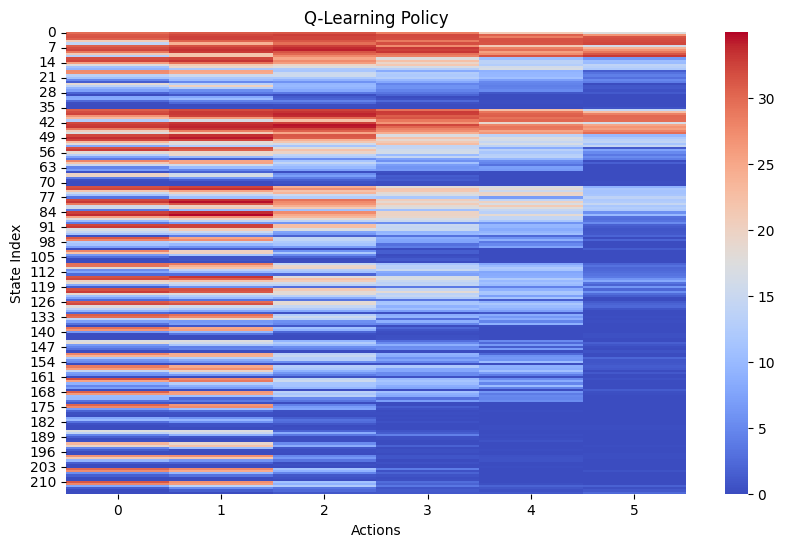

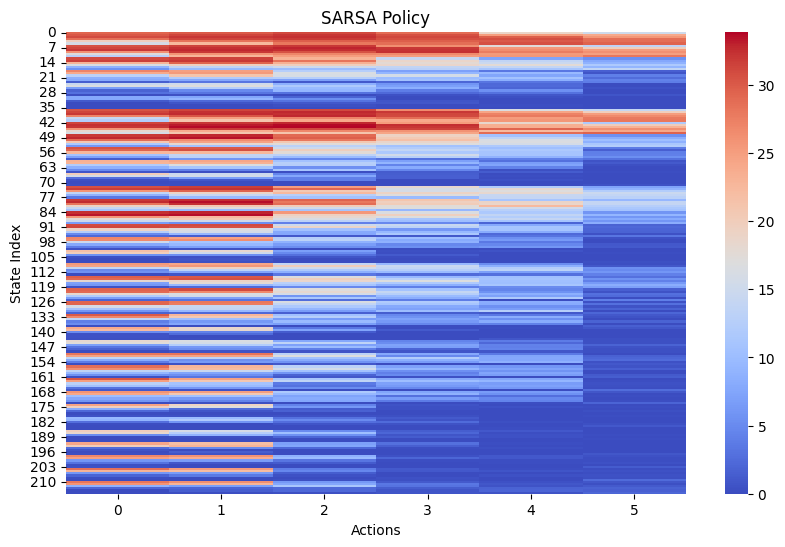

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize Q-table
def plot_q_table(Q, title):
    avg_q_values = np.mean(Q, axis=-1)  # Average over actions
    avg_q_values = avg_q_values.reshape(-1, avg_q_values.shape[-1])  # Flatten for heatmap

    plt.figure(figsize=(10, 6))
    sns.heatmap(avg_q_values, cmap="coolwarm", annot=False)
    plt.title(title)
    plt.xlabel("Actions")
    plt.ylabel("State Index")
    plt.show()

# Plot the Q-tables for comparison
plot_q_table(q_table, "Q-Learning Policy")
plot_q_table(sarsa_table, "SARSA Policy")


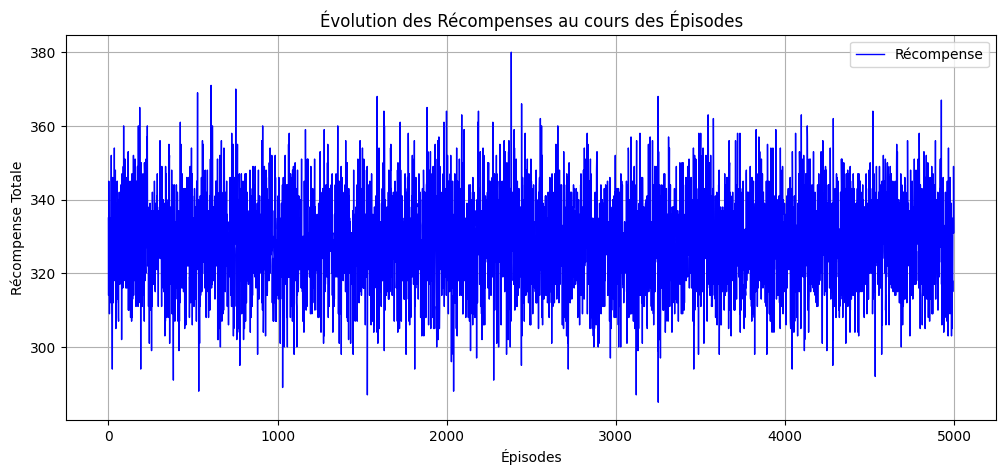

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Stocker les récompenses par épisode
reward_evolution = []

# Q-Learning avec suivi des récompenses
def q_learning_with_rewards(env, episodes=5000):
    global reward_evolution
    reward_evolution = []  # Liste pour stocker les récompenses

    for episode in range(episodes):
        state = env.reset()
        state_idx = get_state_index(state)
        total_reward = 0  # Récompense totale par épisode

        for _ in range(100):  # Limite la longueur de l'épisode
            action = np.argmax(Q[state_idx]) if np.random.rand() > epsilon else np.random.choice([0, 1])
            next_state, reward = env.step(action)
            next_state_idx = get_state_index(next_state)

            # Mise à jour de la Q-Table
            Q[state_idx + (action,)] += alpha * (reward + gamma * np.max(Q[next_state_idx]) - Q[state_idx + (action,)])

            state_idx = next_state_idx  # Mise à jour de l'état
            total_reward += reward  # Accumuler la récompense

        reward_evolution.append(total_reward)  # Enregistrer la récompense totale par épisode

# Exécuter l'entraînement avec suivi des récompenses
q_learning_with_rewards(env)

# 📈 Tracer l'évolution des récompenses
plt.figure(figsize=(12, 5))
plt.plot(range(len(reward_evolution)), reward_evolution, label="Récompense", color="blue", linewidth=1)
plt.xlabel("Épisodes")
plt.ylabel("Récompense Totale")
plt.title("Évolution des Récompenses au cours des Épisodes")
plt.legend()
plt.grid()
plt.show()


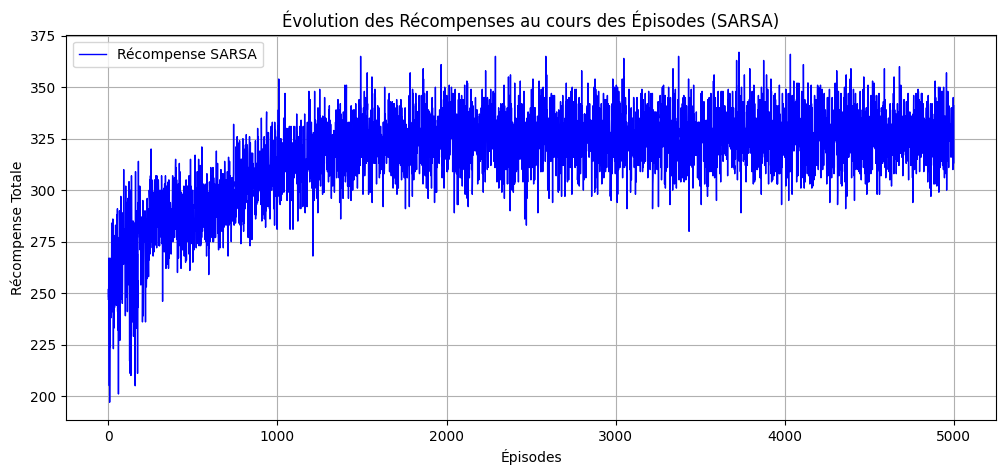

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Stocker l'évolution des récompenses
reward_evolution_sarsa = []

# SARSA avec suivi des récompenses
def sarsa_with_rewards(env, episodes=num_episodes):
    global reward_evolution_sarsa
    reward_evolution_sarsa = []  # Liste des récompenses

    Q = np.zeros((6, 6, 6, 6, 2))  # Q-table

    for episode in range(episodes):
        state = env.reset()
        state_idx = get_state_index(state)
        action = np.random.choice([0, 1]) if np.random.rand() < epsilon else np.argmax(Q[state_idx])
        total_reward = 0  # Récompense totale de l'épisode

        for step in range(max_steps_per_episode):
            next_state, reward = env.step(action)
            next_state_idx = get_state_index(next_state)
            next_action = np.random.choice([0, 1]) if np.random.rand() < epsilon else np.argmax(Q[next_state_idx])

            # Mise à jour de SARSA
            Q[state_idx + (action,)] += alpha * (reward + gamma * Q[next_state_idx + (next_action,)] - Q[state_idx + (action,)])

            state_idx, action = next_state_idx, next_action
            total_reward += reward  # Accumuler la récompense de l'épisode

        reward_evolution_sarsa.append(total_reward)  # Stocker la récompense totale

# Exécuter l'entraînement avec suivi des récompenses
sarsa_with_rewards(env)

# 📈 Tracer l'évolution des récompenses pour SARSA
plt.figure(figsize=(12, 5))
plt.plot(range(len(reward_evolution_sarsa)), reward_evolution_sarsa, label="Récompense SARSA", color="blue", linewidth=1)
plt.xlabel("Épisodes")
plt.ylabel("Récompense Totale")
plt.title("Évolution des Récompenses au cours des Épisodes (SARSA)")
plt.legend()
plt.grid()
plt.show()
